# Student Career Performance Analysis
This notebook analyzes student career performance data using regression and classification models.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load Dataset
Read the student career performance dataset and display basic info.

In [2]:
df = pd.read_csv('student_career_performance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student_ID       5049 non-null   object 
 1   Hours_Study      4956 non-null   float64
 2   Sleep_Hours      4960 non-null   float64
 3   Internships      5049 non-null   int64  
 4   Projects         5049 non-null   int64  
 5   CGPA             4945 non-null   float64
 6   Placement_Score  5049 non-null   float64
 7   Placed           5049 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 315.7+ KB


## Handle Missing Values
Fill missing values in key columns with their median.

In [3]:
for col in ['Hours_Study', 'Sleep_Hours', 'Internships', 'Projects', 'CGPA', 'Placement_Score', 'Placed']:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student_ID       5049 non-null   object 
 1   Hours_Study      5049 non-null   float64
 2   Sleep_Hours      5049 non-null   float64
 3   Internships      5049 non-null   int64  
 4   Projects         5049 non-null   int64  
 5   CGPA             5049 non-null   float64
 6   Placement_Score  5049 non-null   float64
 7   Placed           5049 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 315.7+ KB


C:\Users\archi\AppData\Local\Temp\ipykernel_14664\3485050254.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace =True)
C:\Users\archi\AppData\Local\Temp\ipykernel_14664\3485050254.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

## Data Cleaning
Remove outliers and invalid data entries.

In [4]:
df['Total_Hours']=df['Hours_Study'] + df['Sleep_Hours']
df = df[df['Total_Hours'] <= 24]
df = df[df['Hours_Study'] >= 0]
df = df[df['CGPA'] <= 10]
df = df[~((df['Placed'] == 0) & (df['Placement_Score'] ==100))]
df.describe()

,Hours_Study,Sleep_Hours,Internships,Projects,CGPA,Placement_Score,Placed,Total_Hours
count,4567.000000,4567.00000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000
mean,5.688132,7.18822,1.840815,3.155463,7.795769,99.667265,0.994745,12.876352
std,2.062637,1.20742,1.369628,1.755014,1.150138,2.382488,0.072309,2.385291
min,0.100000,2.50000,0.000000,0.000000,3.660000,51.900000,0.000000,4.300000
25%,4.400000,6.40000,1.000000,2.000000,7.010000,100.000000,1.000000,11.300000
50%,5.600000,7.20000,2.000000,3.000000,7.850000,100.000000,1.000000,12.800000
75%,6.800000,8.00000,3.000000,4.000000,8.610000,100.000000,1.000000,14.300000
max,17.200000,11.30000,8.000000,11.000000,10.000000,100.000000,1.000000,24.000000


## Prepare Features and Target for Classification
Separate features and target variable for placement prediction.

In [5]:
y_target = df['Placed']
X_features = df.drop(columns=['Placed', 'Student_ID', 'Total_Hours'])

## Train-Test Split
Split the data into training and testing sets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

## Logistic Regression Model
Train a logistic regression model to predict placement.

In [7]:
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)

## Classification Metrics
Evaluate the logistic regression model using accuracy, precision, recall, F1 score, and ROC AUC.

In [8]:

print(f'Logistic Regression Test Accuracy: {logistic_accuracy:.4f}')
print(f"Precision: {precision_score(y_test, y_pred_logistic):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred_logistic):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_logistic):.2f}")
print(f"ROC AUC:   {roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:,1]):.2f}")

Logistic Regression Test Accuracy: 0.9945
Precision: 0.99
Recall:    1.00
F1 Score:  1.00
ROC AUC:   0.95


## Confusion Matrix
Visualize the confusion matrix for the logistic regression model.

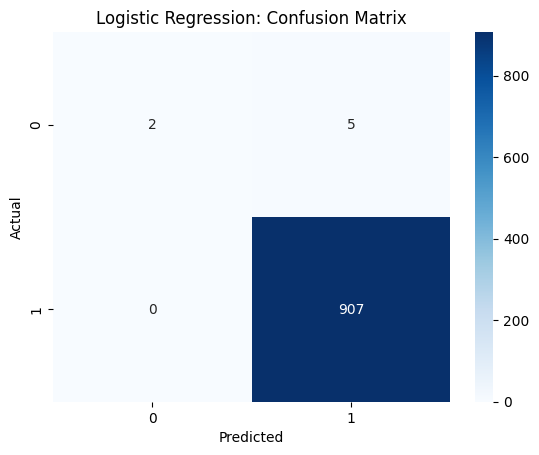

In [9]:
cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()

## Data Summary
Display summary statistics of the cleaned dataset.

In [10]:
df.describe()   

,Hours_Study,Sleep_Hours,Internships,Projects,CGPA,Placement_Score,Placed,Total_Hours
count,4567.000000,4567.00000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000
mean,5.688132,7.18822,1.840815,3.155463,7.795769,99.667265,0.994745,12.876352
std,2.062637,1.20742,1.369628,1.755014,1.150138,2.382488,0.072309,2.385291
min,0.100000,2.50000,0.000000,0.000000,3.660000,51.900000,0.000000,4.300000
25%,4.400000,6.40000,1.000000,2.000000,7.010000,100.000000,1.000000,11.300000
50%,5.600000,7.20000,2.000000,3.000000,7.850000,100.000000,1.000000,12.800000
75%,6.800000,8.00000,3.000000,4.000000,8.610000,100.000000,1.000000,14.300000
max,17.200000,11.30000,8.000000,11.000000,10.000000,100.000000,1.000000,24.000000


## Prepare Features and Target for Regression
Separate features and target variable for placement score prediction.

In [11]:
y1_target = df['Placement_Score']
X1_features = df.drop(columns=['Placement_Score', 'Student_ID', 'Placed', 'Total_Hours'])

## Train-Test Split for Regression
Split the data for regression analysis.

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_features, y1_target, test_size=0.2, random_state=42)

## Linear Regression Model
Train a linear regression model to predict placement scores.

In [13]:
Linear_model = LinearRegression()
Linear_model.fit(X1_train, y1_train)
y1_pred_Linear = Linear_model.predict(X1_test)
print(f"Mean Absolute Error: {mean_absolute_error(y1_test, y1_pred_Linear):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y1_test, y1_pred_Linear):.4f}")
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_Linear))
print(f"Root Mean Squared Error: ", rmse)
print(f"R2 Score is not a valid metric here becuse the variance is very less and the data is highly imbalanced")

Mean Absolute Error: 0.7631
Mean Squared Error: 4.8245
Root Mean Squared Error:  2.19646950005447
R2 Score is not a valid metric here becuse the variance is very less and the data is highly imbalanced


## Regression Results Visualization
Plot actual vs. predicted placement scores.

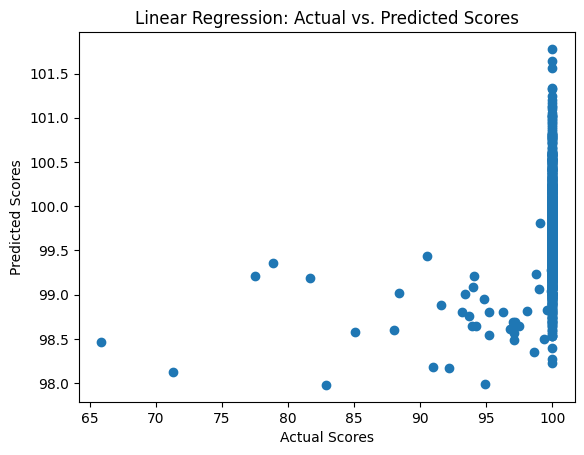

In [14]:
plt.scatter(y1_test, y1_pred_Linear)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Linear Regression: Actual vs. Predicted Scores")
plt.show()

# Comparison: Linear vs Logistic Regression

| Aspect | **Logistic Regression** | **Linear Regression** |
|-------|----------------------|---------------------|
| **Goal** | Classification – predicts whether a student is **placed (1) or not placed (0)**. | Regression – predicts a continuous score (**Placement_Score**). |
| **Performance** | **Accuracy: 99.45%**, Precision: 0.99, Recall: 1.00 → Excellent at identifying placed students. | **RMSE: 2.19**, MAE: 0.76 → Low error, but score distribution is very narrow (most students have ~100). |
| **Interpretability** | Provides probability of being placed, useful for decision-making and risk assessment. | Useful for estimating relative placement performance but less meaningful when scores are nearly constant. |
| **Best Use Case** | Determining if a student is likely to be placed – highly reliable here. | Predicting fine-grained placement scores if score variance is higher. |

**Conclusion:** Logistic Regression is more effective here because the key outcome is **binary placement status**, and the model achieves near-perfect classification. Linear regression offers little additional insight due to low score variance.

---

# Key Insights on Student Performance & Placement Readiness

1. **Study Hours Have a Strong Impact on Placement**  
   Students with **more study hours** are significantly more likely to be placed. Median study hours for placed students is higher than for those not placed, indicating that study time is a key predictor.

2. **CGPA Plays a Significant Role**  
   CGPA is a strong predictor. Most placed students have CGPA **above 7.0**, and very few below 6.5 are placed.

3. **Experience Matters (Internships + Projects)**  
   Students with **≥2 internships and ≥3 projects** show the highest placement probability. Those with 0 internships are slightly less likely to be placed even with good CGPA.
```
